Constance Delannoy

APPM 4650 | Homework 4

July 8, 2020

In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="The raw code is by default hidden for easier reading."></form>''')

__Question 1__

We have $\int_0^1 f(x)dx = af(\frac{1}{3}) + bf(\frac{2}{3})$

Using the direct method, we now get:

$\int_{0}^1 1dx = x \rvert_{0}^1 = 1 \rightarrow a+b = 1$

$\int_{0}^1 xdt = \frac{x^2}{2} \rvert_{0}^1 = \frac{1}{2} \rightarrow \frac{a}{3} + \frac{2b}{3} = \frac{1}{2}$

Thus: $a=\frac{1}{2}$ and $b=\frac{1}{2}$ so that:

$\int_0^1 f(x)dx = \frac{1}{2}f(\frac{1}{3}) - \frac{1}{2}f(\frac{2}{3})$

__Question 2__

In [2]:
def rk4(f1, f2, f1true, f2true, a, b, h):
    "applying RK-4 to system of coupled ODEs when we know the truth"
    
    res = {'x':[0], 'y1_est':[1], 'y2_est': [1], 'y1_error': [0], 'y2_error':[0], 'y1_true': [1], 'y2_true': [1]}
    steps = list(map(lambda x: x/10, range(0, 10, 2)))
    
    for t in steps:
        
        k11 = h*f1(t, a, b)
        k12 = h*f2(t, a, b)
        
        k21 = h*f1(t + h/2, a + k11/2, b + k12/2)
        k22 = h*f2(t + h/2, a + k11/2, b + k12/2)
        
        k31 = h*f1(t + h/2, a + k21/2, b + k22/2)
        k32 = h*f2(t + h/2, a + k21/2, b + k22/2)
        
        k41 = h*f1(t + h, a + k31, b + k32)
        k42 = h*f2(t + h, a + k31, b + k32)
        
        f1_est = a + (1/6)*(k11 + 2*k21 + 2*k31 + k41)
        f2_est = b + (1/6)*(k12 + 2*k22 + 2*k32 + k42)
        
        f1_true = f1true(t+h)
        f2_true = f2true(t+h)
        
        f1_err = abs(f1_true - f1_est)
        f2_err = abs(f2_true - f2_est)
        
        res['x'].append(t+h)
        res['y1_est'].append(f1_est)
        res['y2_est'].append(f2_est)
        res['y1_error'].append(f1_err)
        res['y2_error'].append(f2_err)
        res['y1_true'].append(f1_true)
        res['y2_true'].append(f2_true)
        
        a = f1_est
        b = f2_est
        
    return res

In [3]:
def fun1(t, a, b):
    "this is u'1 in the homework"

    y = 3*a + 2*b - (2*t**2 + 1)*math.exp(2*t)
    
    return y

def fun2(t, a, b):
    "this is u'2 in the homework"
    
    y = 4*a + b + (t**2 + 2*t - 4)*math.exp(2*t)
    
    return y

def fun1_true(t):
    "this is u1(t) in the homework"
    
    y = (1/3)*math.exp(5*t) - (1/3)*math.exp(-t) + math.exp(2*t)
    
    return y

def fun2_true(t):
    "this is u2(t) in the homework"
    
    y = (1/3)*math.exp(5*t) + (2/3)*math.exp(-t) + (t**2)*math.exp(2*t)
    
    return y

To compare results, we produce a table below of the real and estimated values as well as the error. 
We notice that the errors grows with each iteration, a product of compounded uncertainty as we extrapolate further from the truth we know (the initial conditions).

In [4]:
rk4_df = pd.DataFrame(rk4(fun1, fun2, fun1_true, fun2_true, 1, 1, 0.2))
rk4_df

,x,y1_error,y1_est,y1_true,y2_error,y2_est,y2_true
0,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
1,0.2,0.004643,2.120366,2.125008,0.004596,1.506992,1.511587
2,0.4,0.023892,4.441228,4.465120,0.023745,3.242240,3.265985
3,0.6,0.093225,9.739133,9.832359,0.092878,8.163417,8.256295
4,0.8,0.326080,22.676560,23.002639,0.325349,21.343528,21.668877
5,1.0,1.076302,55.661181,56.737483,1.074859,56.030503,57.105362


The two graphs below illustrate the findings of the table. We notice that in both cases, the "truth" and the "estimate" line diverge as $x$ gets bigger.

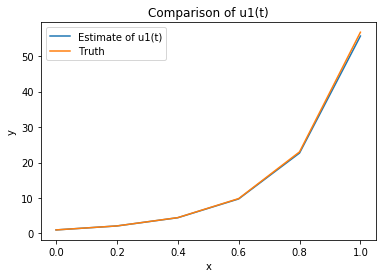

In [5]:
x = rk4_df.x

plt.plot(x, rk4_df.y1_est, label = "Estimate of u1(t)")
plt.plot(x, rk4_df.y1_true, label = "Truth")

plt.legend(loc='upper left')

plt.xlabel("x")
plt.ylabel("y")
plt.title('Comparison of u1(t)')
plt.show()

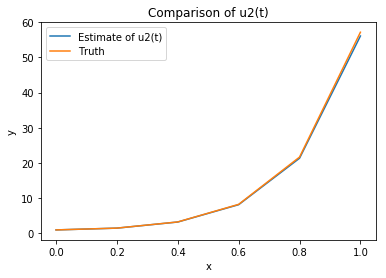

In [6]:
plt.plot(x, rk4_df.y2_est, label = "Estimate of u2(t)")
plt.plot(x, rk4_df.y2_true, label = "Truth")

plt.legend(loc='upper left')

plt.xlabel("x")
plt.ylabel("y")
plt.title('Comparison of u2(t)')
plt.show()

__Question 3__

(a) We start with Adams-Bashforth 2-point. Below is a table with results.

In [7]:
def ab2(funs, x0, y0, x1, y1, N, h):
    "This is Adams-Bashforth 2-point method"
    
    res = {'x':[x0, x1], 'y':[y0, y1]}

    for i in N:
        y2 = y1 + (3/2)*h*funs(x1, y1) - (h/2)*funs(x0,y0)
        
        res['x'].append(x1+h)
        res['y'].append(y2)
        
        x0 = x1
        y0 = y1
        x1 = x1+h
        y1 = y2
        
    return res

def q3seed(x):
    "this is to get seed values based on homework Q3"
    
    y = (x**2)/2
    
    return y

def q3funs(x, y):
    "this is the ODE in Q3"
    
    y_prime = x+y
    
    return y_prime

In [8]:
steps = range(4)

#seed values for 2-point methods
x_true0 = 0
y_true0 = 0

xseed1 = 0.1
yseed1 = q3seed(xseed1)

In [9]:
ab2_df = pd.DataFrame(ab2(q3funs, x_true0, y_true0, xseed1, yseed1, steps, 0.1))
ab2_df

,x,y
0,0.0,0.000000
1,0.1,0.005000
2,0.2,0.020750
3,0.3,0.048613
4,0.4,0.089867
5,0.5,0.145916


(b) We now use Adams-Moulton 2-point to produce a similar table.

In [10]:
def am2(x0, y0, x1, y1, steps, h):
    "This is Adams-Moulton 2-step method (implicit) specifically for Q3"
    
    res = {'x':[x0, x1], 'y':[y0, y1]}
    x2 = x1+h
    
    for i in steps:
        
        y2 = (12/(12-5*h))*(y1 + (5*h/12)*x2 + (h/12)*(8*(x1+y1) - (x0 + y0)))
        
        res['x'].append(x2)
        res['y'].append(y2)
        
        x0 = x1
        y0 = y1
        x1 = x2
        y1 = y2  
        x2 = x2+h

    return res

am2_df = pd.DataFrame(am2(x_true0, y_true0, xseed1, yseed1, range(4), 0.1))
am2_df

,x,y
0,0.0,0.000000
1,0.1,0.005000
2,0.2,0.021217
3,0.3,0.049659
4,0.4,0.091610
5,0.5,0.148491


(c) Finally, we use the Predictor-corrector method with Adams-Bashforth 4-point as predictor and Adams-Moulton 3-point as corrector.

In [11]:
def predcor(x0, x1, x2, x3, h, steps, funs):
        
        y0 = q3seed(x0)
        y1 = q3seed(x1)
        y2 = q3seed(x2)
        y3 = q3seed(x3)
            
        res = {'x':[x0, x1, x2, x3], 'y':[y0, y1, y2, y3]}
    
        for i in steps:
            
            y0 = q3seed(x0)
            y1 = q3seed(x1)
            y2 = q3seed(x2)
            y3 = q3seed(x3)
            
            x4 = x3+h

            y4_star = y3 + (h/24)*(55*funs(x3, y3) - 59*funs(x2, y2) + 37*funs(x1, y1) - 9*funs(x0, y0))
            
            y4 = y3 + (h/24)*(9*funs(x4, y4_star) + 19*funs(x3, y3) - 5*funs(x2, y2) + funs(x1, y1))
            
            res['x'].append(x4)
            res['y'].append(y4)
        
            x0 = x1
            x1 = x2
            x2 = x3
            x3 = x4
        
        return res

times_to_run = range(2)
predcor_df = pd.DataFrame(predcor(0, 0.1, 0.2, 0.3, 0.1, times_to_run, q3funs))
predcor_df

,x,y
0,0.0,0.000000
1,0.1,0.005000
2,0.2,0.020000
3,0.3,0.045000
4,0.4,0.086398
5,0.5,0.135548


In [12]:
def sol_q3(x):
    "this is the solution to Q3 based on lecture notes"
    y = math.exp(x)-x-1
    return y

x = list(map(lambda x: x/10, range(6)))
q3_sol = list(map(lambda x: sol_q3(x), x))
q3_sol

q3_sol_df = pd.DataFrame({'x':x, 'sol':q3_sol})

From lecture notes, we know that the true solution to this ODE is $f(x) = e^x - x- 1$. We plot our three attempts at finding this solution together with the true answer in the graph below.

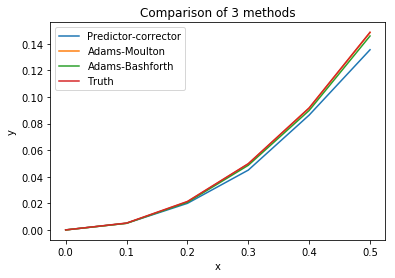

In [13]:
x = predcor_df.x
pred_cor = predcor_df.y
am_2 = am2_df.y
ab_2 = ab2_df.y

plt.plot(x, pred_cor, label = "Predictor-corrector")
plt.plot(x, am_2, label = "Adams-Moulton")
plt.plot(x, ab_2, label = "Adams-Bashforth")
plt.plot(x, q3_sol_df.sol, label = "Truth")

plt.legend(loc='upper left')

plt.xlabel("x")
plt.ylabel("y")
plt.title('Comparison of 3 methods')
plt.show()

Based on this graph, we see that the Predictor-corrector method is the furthest from the truth. This is due to the fact that we needed to use our seed function past its validity range (we produced seed values from 0 to 0.3 with it). A better way to get those seed values would have been to use RK-4, or to reduce the step size to stay closer to 0. The Adams-Moulton method seems to be performing the best